In [3]:
import numpy as np
from scipy import ndimage
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np
from math import *
import stpy
#### Import SACLA python library
# os.system("module load python/SACLA_python-3.7")
# os.system("python3")
import dbpy
import stpy

from citius import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from IPython.display import HTML
HTML("""
<script>
window.IPython = {
  notebook: {
    kernel: { execute: function(cmd) { console.log("kernel exec blocked:", cmd); } }
  }
};
</script>
""")

In [5]:
# collect runs to build avDark_im
read_path = "citiusData"

readCITIUS = CITIUSReader(read_path, bl=3)

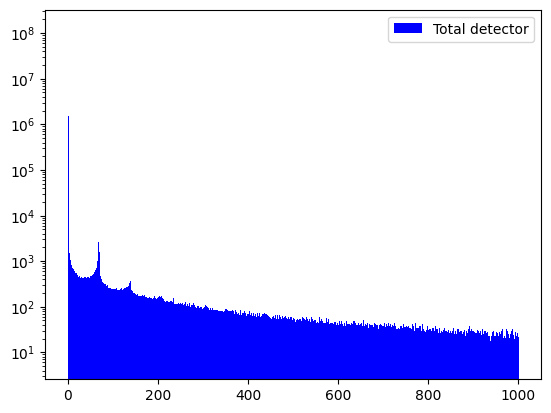

In [6]:
run_list = np.arange(1616892, 1616892+1)
img_list, imgROI_list, bins_list, counts_list, binsROI_list, countsROI_list \
= readCITIUS.read_runlist(run_list)

counts = np.sum(counts_list,axis=0)
counts_roi = np.sum(countsROI_list,axis=0)


plt.figure()
plt.bar(bins_list[0],counts, color='blue', label='Total detector')
# plt.bar(binsROI_list[0],counts_roi, color='orange', label='ROI detector')
plt.yscale('log')
plt.legend()
plt.show()

[warning] only found 2 peaks (need 3).
Try: increasing `nbins`, lowering `peak_prominence_frac`, or narrowing ROI.


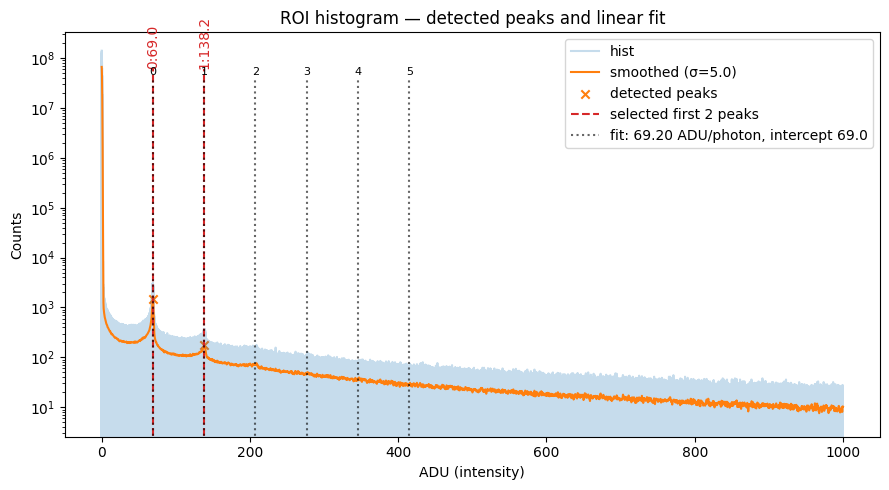

Selected peak ADU positions (first peaks): [ 68.97 138.18]
Slope (ADU / photon): 69.2000
Intercept (ADU): 68.97
R^2 of linear fit (selected peaks): 1.0000


In [7]:
results = readCITIUS.find_and_fit_peaks(counts,
                   bin_centers=bins_list[0],
                   smooth_sigma=5.0,
                   peak_prominence_frac=0.000001,
                   n_peaks_needed=3,
                   plot=True)